In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from IPython.display import Image
import graphviz
import pydotplus
import seaborn as sns
import graphviz
import warnings
warnings.filterwarnings('ignore')

1. age
2. sex
3. chest pain type (4 values)
4. resting blood pressure
5. serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl
7. resting electrocardiographic results (values 0,1,2)
8. maximum heart rate achieved
9. exercise induced angina
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target

In [ ]:
#reading a .data file.
dataset =  pd.read_csv('heart.csv', sep=",")    #, names=['age','sex','chest-pain','r-blood-sugar','cholestrol','f-blood-sugar','ecg','heart-rate','exercise','old-peak','slope','ca','thal','target'])
dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


###a) EDA and preprocessing of data

In [ ]:
dataset.shape

(1025, 14)

In [ ]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


####Data Preparation and Visualisation

In [ ]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
dataset.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


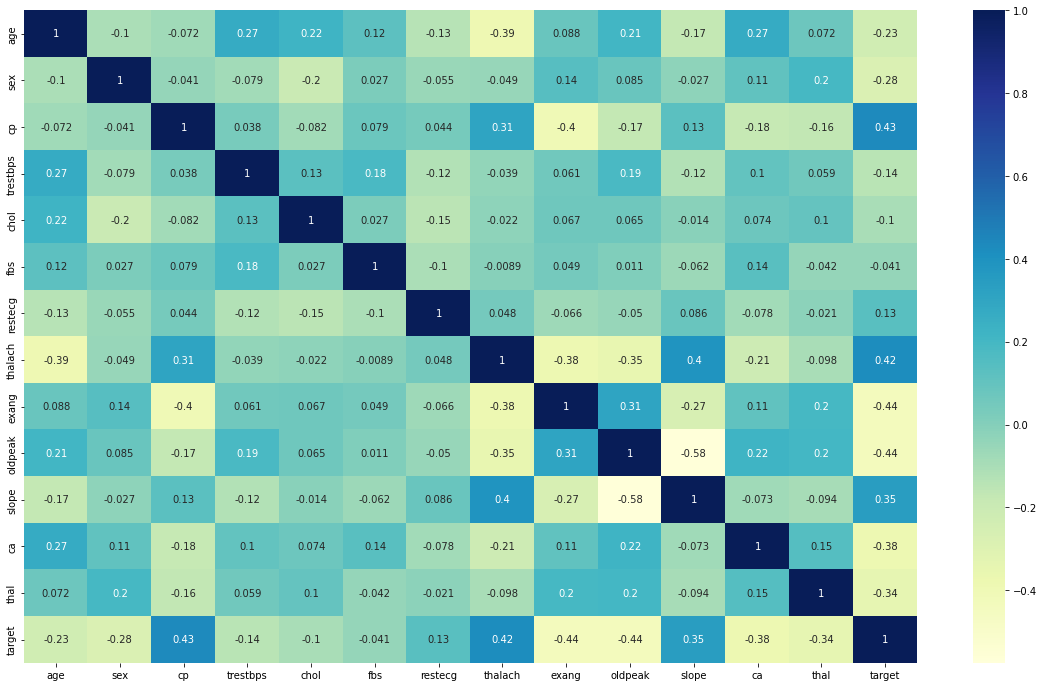

In [ ]:
#Using heatmap, we study correlation between variables i.e. how much two variables are corelated.

plt.figure(figsize=(20, 12))                    #used to manipulate the size of the plots.
dataplot = sns.heatmap(dataset.corr(), cmap="YlGnBu", annot=True)
plt.show()

####Observation:  No such high corelation between any 2 variables.

In [ ]:
#there are many categorical attributes present.
print('Unique Values of Sex: {}'.format(dataset['sex'].unique()))
print('Unique Values of Chest Pain: {}'.format(dataset['cp'].unique()))
print('Unique Values of Fbs: {}'.format(dataset['fbs'].unique()))
print('Unique Values of RestECG: {}'.format(dataset['restecg'].unique()))
print('Unique Values of Exang: {}'.format(dataset['exang'].unique()))
print('Unique Values of Slope: {}'.format(dataset['slope'].unique()))
print('Unique Values of Ca: {}'.format(dataset['ca'].unique()))
print('Unique Values of thal: {}'.format(dataset['thal'].unique()))
print('Unique Values of Target: {}'.format(dataset['target'].unique()))

Unique Values of Sex: [1 0]
Unique Values of Chest Pain: [0 1 2 3]
Unique Values of Fbs: [0 1]
Unique Values of RestECG: [1 0 2]
Unique Values of Exang: [0 1]
Unique Values of Slope: [2 0 1]
Unique Values of Ca: [2 0 1 3 4]
Unique Values of thal: [3 2 1 0]
Unique Values of Target: [0 1]


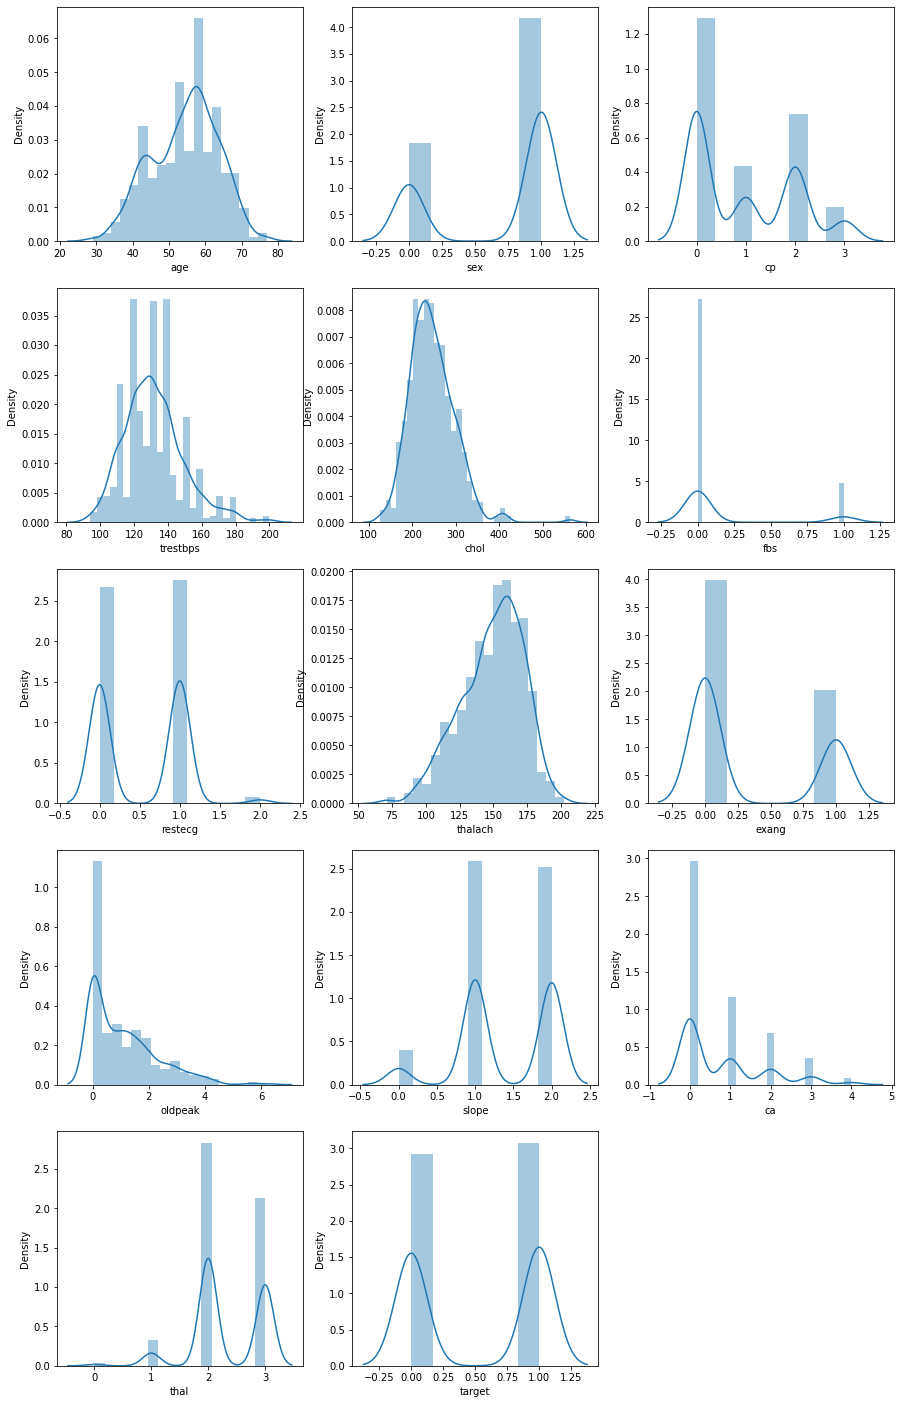

In [ ]:
#distplot if plotted on numerical variables.
#This implies we have 5 numerical attributes amoung 14. 9 categorical attributes.
plt.figure(figsize=(15, 25))
columns = list(dataset.columns)
for i in range(14):
  plt.subplot(5, 3, i+1)
  sns.distplot(dataset[columns[i]])
plt.show()

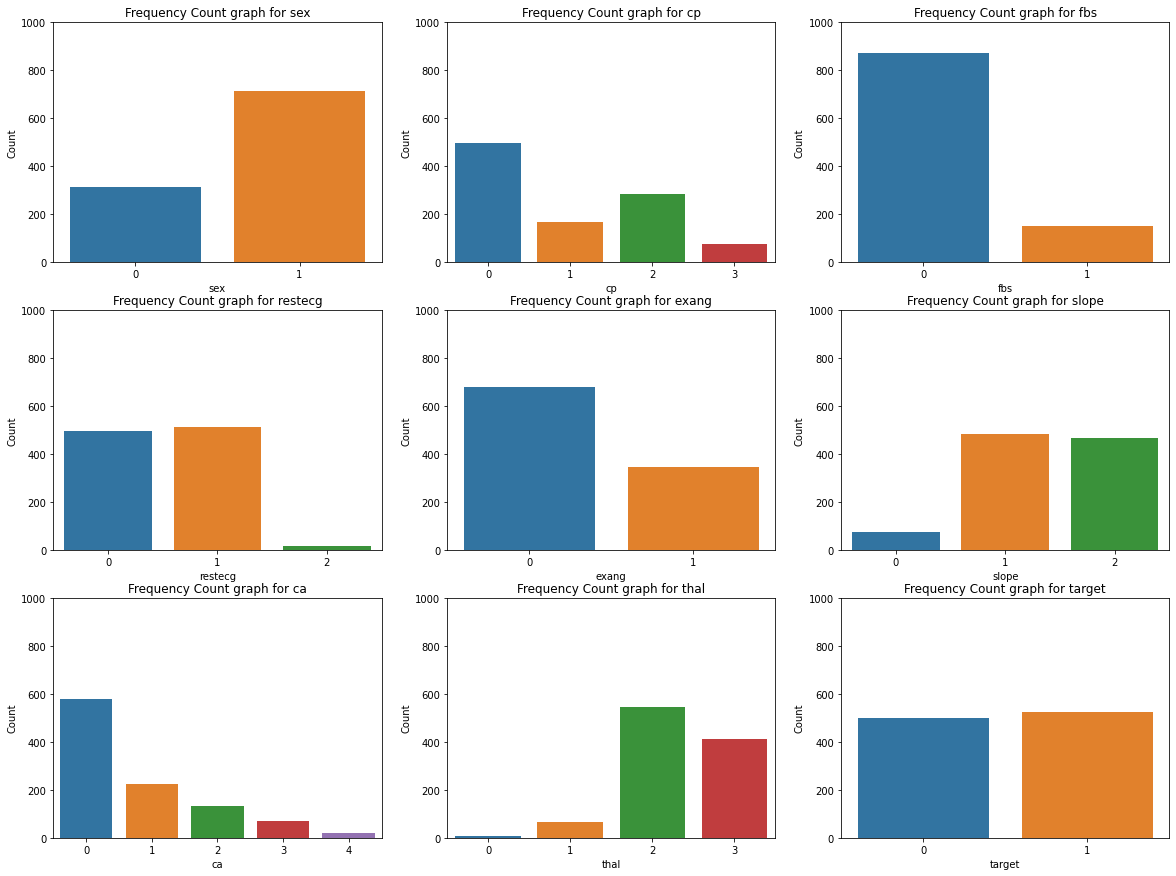

In [ ]:
#preseting all categorical data with their counts.
cat_list = ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']
plt.figure(figsize=(20, 15))

for i in range(len(cat_list)):
  plt.subplot(3, 3, i+1)
  graph =sns.countplot(x =cat_list[i], data = dataset)
  graph.set_ylim(0,1000)
  plt.ylabel('Count')
  plt.title('Frequency Count graph for {}'.format(cat_list[i]))

### b) Training decision tree using gini index and entropy.

In [ ]:
X=dataset.drop(['target'], axis=1)
Y=dataset['target']
print(X.shape)
print(Y.shape)

(1025, 13)
(1025,)


In [ ]:
#splitting the dataset training dataset and test dataset
#0.2 i.e. 20% of the data is test data. and 0.8 i.e. 80% of the data = training data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
# train_using_gini index
  
classifier_gini = DecisionTreeClassifier(criterion = "gini")
classifier_gini.fit(X_train, Y_train)
Y_pred_gini = classifier_gini.predict(X_test)

classifier_entropy = DecisionTreeClassifier(criterion = "entropy")
classifier_entropy.fit(X_train, Y_train)
Y_pred_entropy = classifier_entropy.predict(X_test)

In [ ]:
print('Gini index accuracy score: {0:0.2f}%' . format(accuracy_score(Y_test, Y_pred_gini)*100))
print('Train set score using gini index: {:.2f}%'.format(classifier_gini.score(X_train, Y_train)*100))
print('Test set score using gini index: {:.2f}%'.format(classifier_gini.score(X_test, Y_test)*100))


Gini index accuracy score: 100.00%
Train set score using gini index: 100.00%
Test set score using gini index: 100.00%


In [ ]:
print('Entropy accuracy score: {0:0.2f}%' . format(accuracy_score(Y_test, Y_pred_entropy)*100))
print('Train set score using entropy: {:.2f}%'.format(classifier_entropy.score(X_train, Y_train)*100))
print('Test set score using entropy: {:.2f}%'.format(classifier_entropy.score(X_test, Y_test)*100))

Entropy accuracy score: 99.03%
Train set score using entropy: 100.00%
Test set score using entropy: 99.03%


####As the accuracy is more for gini index parameter hence we will take forward the 'Gini Index' parameter.

In [ ]:
#dont touch
# print('Gini index accuracy score: {0:0.2f}%' . format(accuracy_score(Y_test, Y_pred_gini)*100))
# print('Entropy accuracy score: {0:0.2f}%' . format(accuracy_score(Y_test, Y_pred_entropy)*100))

# print('Test set score using gini index: {:.2f}%'.format(classifier_gini.score(X_test, Y_test)*100))
# print('Test set score using entropy: {:.2f}%'.format(classifier_entropy.score(X_test, Y_test)*100))

Gini index accuracy score: 100.00%
Entropy accuracy score: 99.03%
Test set score using gini index: 100.00%
Test set score using entropy: 99.03%


##c) Visualising Decision Tree using graphviz and pydotsplus library.

In [ ]:
classifier_gini.tree_.max_depth

9

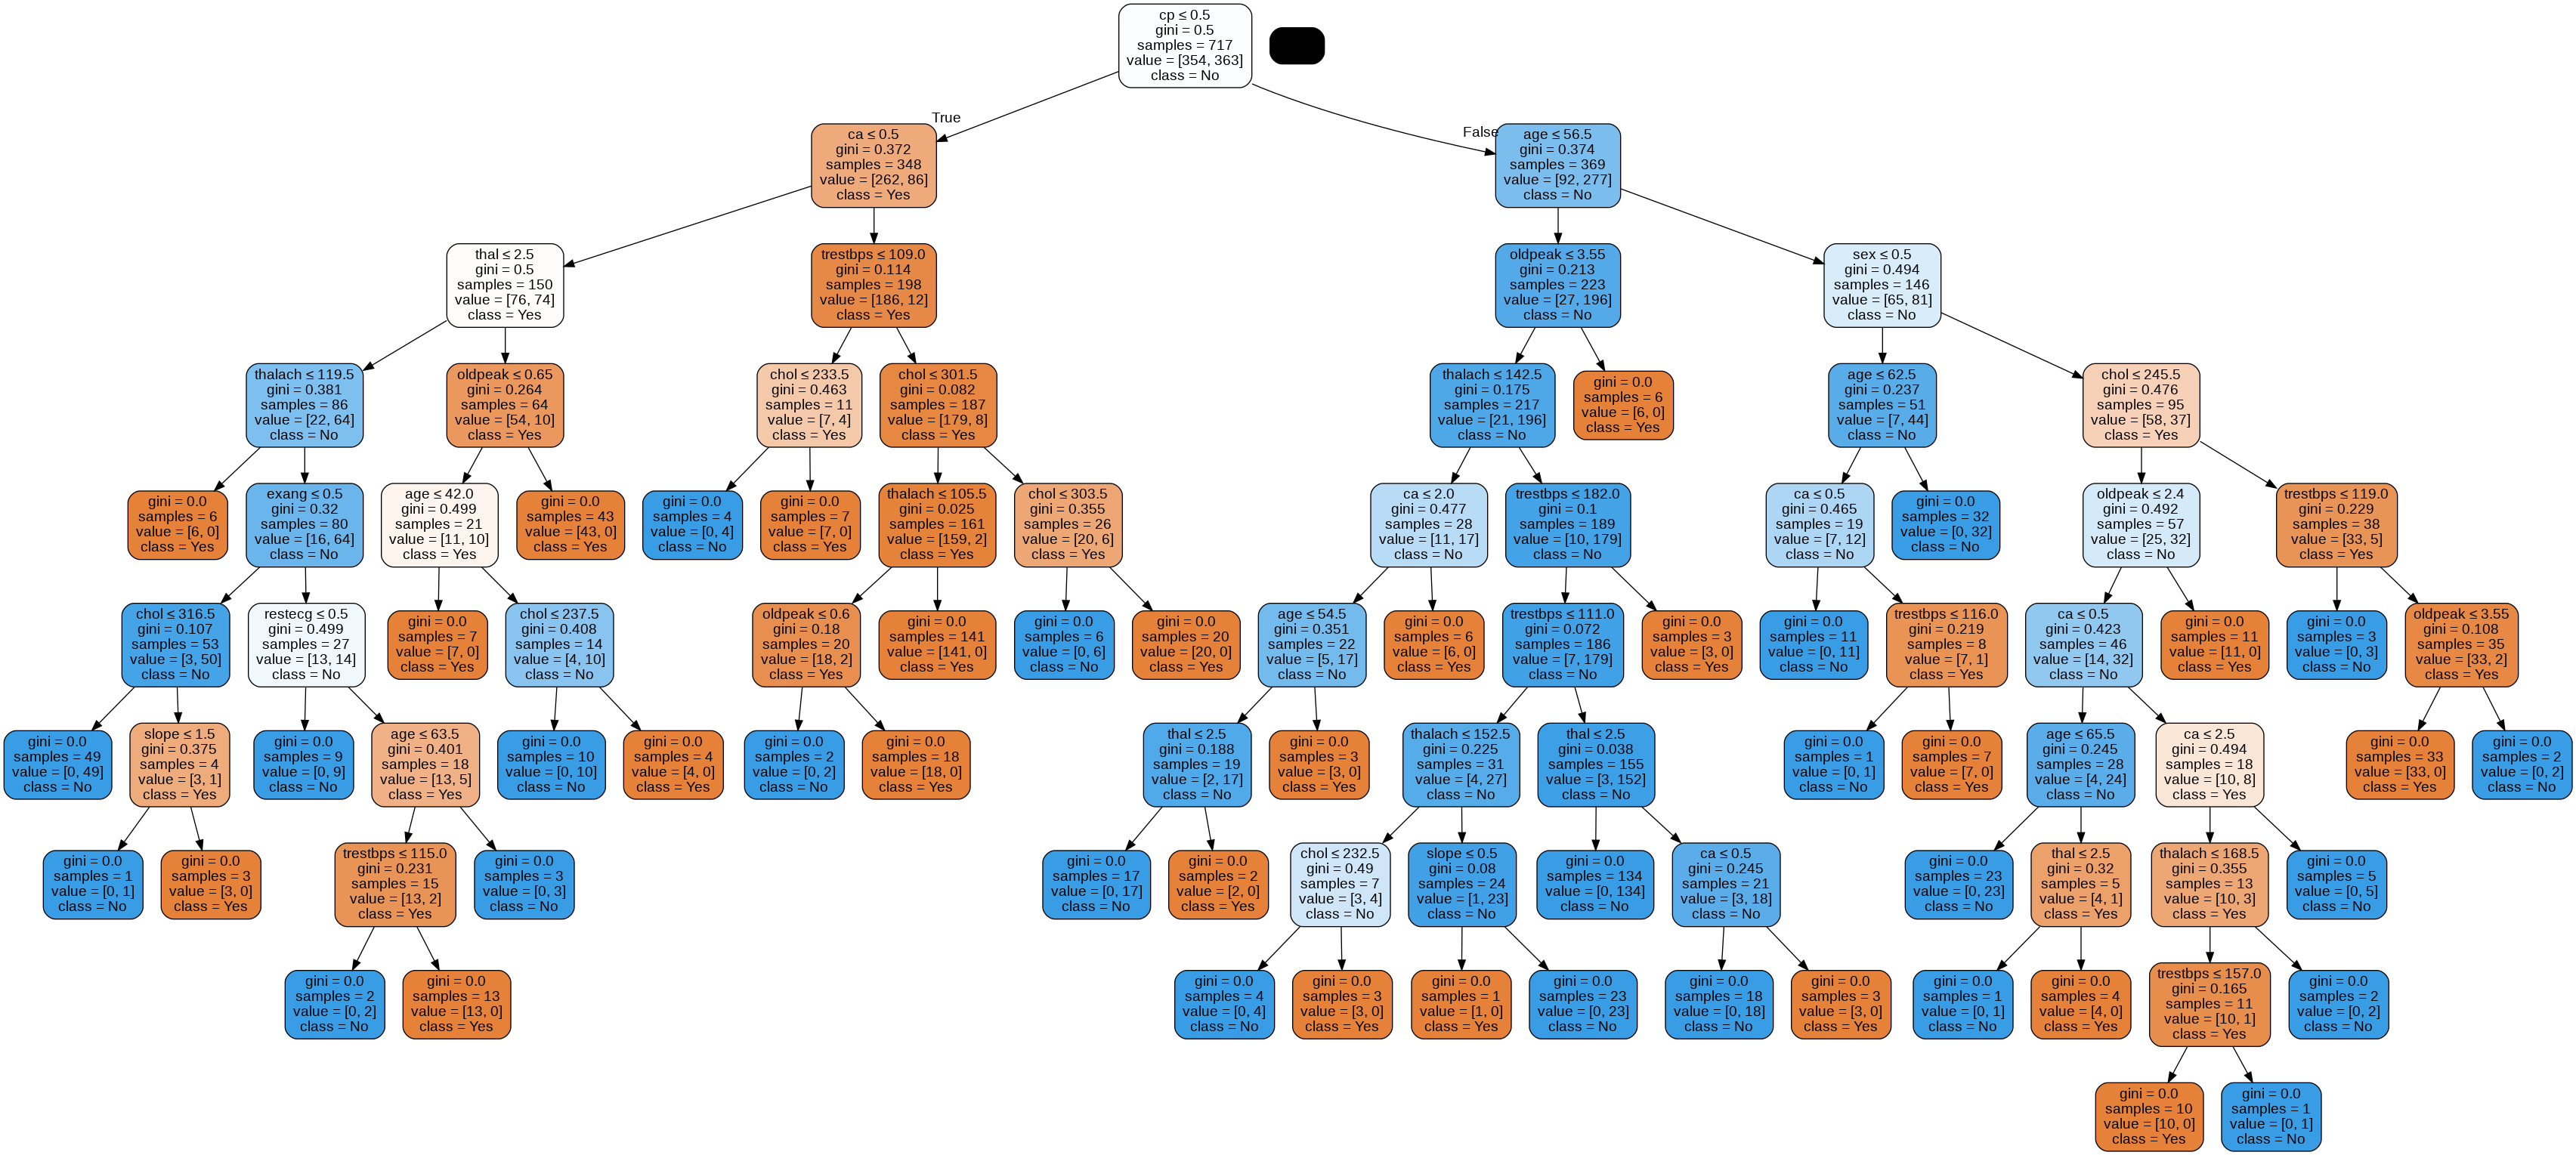

In [ ]:
data = tree.export_graphviz(classifier_gini, out_file=None,feature_names=X_train.columns,  class_names=['Yes', 'No'],  
                            filled=True, rounded=True,  special_characters=True) 
graph = pydotplus.graphviz.graph_from_dot_data(data)
Image(graph.create_png())

In [ ]:

# graphviz.Source(data)

##d)  Training decision trees with different values of the minimum number of samples required to split an internal node. Plotting graph the curve between training and testing accuracy vs ’minimum number of samples required to split’

In [ ]:
lst = [2, 3, 4, 5, 6, 7, 8, 9,10,11,12,13,14,15 ]
test_score= []
train_score = []

for i in range(len(lst)):
  model = DecisionTreeClassifier(random_state=0, min_samples_split=lst[i])  
  model.fit(X_train, Y_train)
  train_score.append(model.score(X_train,Y_train)*100)
  test_score.append(model.score(X_test, Y_test)*100)

print('Test accuracies: {}'.format(test_score))
print('Train accuracies: {}'.format(train_score))

Test accuracies: [99.02597402597402, 98.37662337662337, 98.37662337662337, 97.72727272727273, 96.42857142857143, 96.42857142857143, 96.42857142857143, 95.77922077922078, 95.77922077922078, 95.77922077922078, 94.48051948051948, 94.48051948051948, 94.15584415584416, 94.48051948051948]
Train accuracies: [100.0, 99.86052998605301, 99.86052998605301, 99.72105997210599, 99.30264993026499, 98.88423988842399, 98.88423988842399, 98.74476987447699, 98.74476987447699, 98.74476987447699, 98.04741980474198, 98.04741980474198, 97.76847977684798, 97.62900976290098]


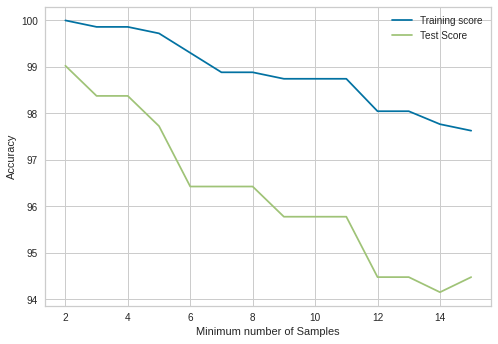

In [ ]:
plt.plot(lst, train_score, label = "Training score")
plt.plot(lst, test_score, label = "Test Score")
plt.xlabel('Minimum number of Samples')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

###Conclusion: min no of sample=2 gives the highest training and testing accuracy. After that it is just decreasing.
###In our earlier model with criteria = 'gini', it also has the highest training and testing accuracy at the default value of min_sample_split which is 2 in sklearn library. So our graph/model justifies that the best value of min_sample_split is 2.